In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv(r"C:\Users\ASUS\Documents\veri analizi 1\new_bike_sales.csv", sep=';') #veri setini okumak

In [81]:
print(data)

              Date  Day     Month  Year  Customer_Age       Age_Group  \
0       26.11.2013   26  November  2013            19     Youth (<25)   
1       26.11.2015   26  November  2015            19     Youth (<25)   
2       23.03.2014   23     March  2014            49  Adults (35-64)   
3       23.03.2016   23     March  2016            49  Adults (35-64)   
4       15.05.2014   15       May  2014            47  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113031  12.04.2016   12     April  2016            41  Adults (35-64)   
113032   2.04.2014    2     April  2014            18     Youth (<25)   
113033   2.04.2016    2     April  2016            18     Youth (<25)   
113034   4.03.2014    4     March  2014            37  Adults (35-64)   
113035   4.03.2016    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0                    M          Canada  Britis

In [72]:
print(data.isnull().sum()) #null değerlerin kategorilerine ayrılmış olarak toplamı

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [73]:
 data.drop_duplicates(inplace = True) #tekrar eden satırları silme

In [154]:
order_quantity=data['Order_Quantity'].sum()  #satış miktarları toplamı
total_cost = data['Cost'].sum()  #maliyet toplamı
total_revenue=data['Revenue'].sum() #gelir toplamı
profit= data['Profit'].sum()  #net gelir toplamı
genders= data.groupby('Customer_Gender').sum() #cinsiyete göre tüm kategorilerin toplamı

In [155]:
bike_sales = data[data['Product_Category'] == 'Bikes']  #bisiklet satışlarının ayrıştırılamsı
clothing_sales = data[data['Product_Category'] == 'Clothing']  #kıyafet satışlarının ayrıştırılması
accessories_sales = data[data['Product_Category'] == 'Accessories']  #aksesuar satışlarının ayrıştırılması

In [156]:
t_bike_sales_by_gender = bike_sales.groupby('Customer_Gender')['Order_Quantity'].sum()  #toplam bisiklet satışları
t_clothing_sales_by_gender = clothing_sales.groupby('Customer_Gender')['Order_Quantity'].sum()  #toplam kıyafet satışları
t_accessories_sales_by_gender = accessories_sales.groupby('Customer_Gender')['Order_Quantity'].sum()  #toplam aksesuar satışları

In [157]:
print(t_bike_sales_by_gender)

Customer_Gender
F    17939
M    18262
Name: Order_Quantity, dtype: int64


In [158]:
print(t_clothing_sales_by_gender)

Customer_Gender
F    120588
M    134125
Name: Order_Quantity, dtype: int64


In [159]:
print(t_accessories_sales_by_gender)

Customer_Gender
F    501431
M    541360
Name: Order_Quantity, dtype: int64


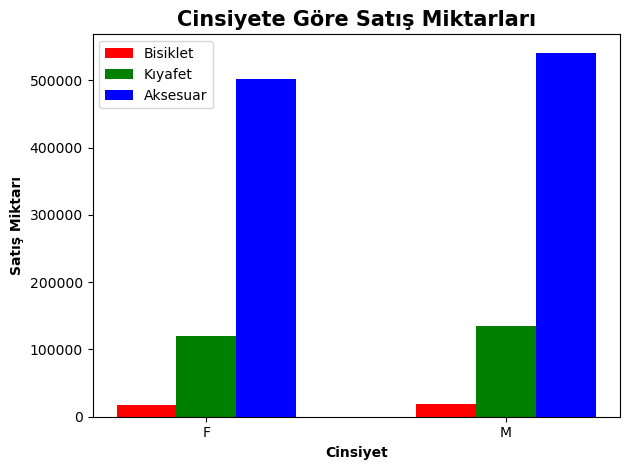

In [168]:
fig, ax = plt.subplots()  # bar grafiği oluşturma

index = range(len(genders.index))  # Cinsiyet kategorilerini indekslemek
bar_width = 0.2  # Bar genişliği

# barların çizilmesi
plt.bar(index, t_bike_sales_by_gender, bar_width, color='r', label='Bisiklet')
plt.bar([i + bar_width for i in index], t_clothing_sales_by_gender, bar_width, color='g', label='Kıyafet')
plt.bar([i + 2 * bar_width for i in index], t_accessories_sales_by_gender, bar_width, color='b', label='Aksesuar')

plt.xlabel("Cinsiyet", fontweight ='bold', fontsize = 10)
plt.ylabel("Satış Miktarı", fontweight ='bold', fontsize = 10)
plt.title("Cinsiyete Göre Satış Miktarları", fontweight ='bold', fontsize = 15)
plt.xticks([i + bar_width for i in index], genders.index) # X ekseni etiketlerini ayarlar
plt.tight_layout()
plt.legend() # Grafikteki barların etiketlerini (label) gösterir